<a href="https://colab.research.google.com/github/kamranuz/mmdm2024-lab-1/blob/master/HSE_MMDM_2024_%7C_%D0%9B%D0%B0%D0%B1%D0%B0%D1%80%D0%BE%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import plotly.express as px
from tqdm import tqdm

# HSE MMDM 2024 | Lab Work №1


-- Rules --
- Grade = 0.3*Task1 + 0.3*Task2 + 0.4*Task3
- You can work in small groups: 1-3 students.
- Correct but basic solution of each task costs 8 points. To get 9, 10 be creative: think of some modification for basic algorithms; cool visualisation may also give you additional points
- Write your own code for algorithms!
- Deadline - TBD


-- Team --

[Mike](https://t.me/MC_Mikel) &
[Вацлав](https://t.me/RinokuS) &
[Kamrаn](https://t.me/kamran_uz)


### **Tickets**
| Title | Explanation | Responsible Person |[_]|
| --- | --- | --- |--- |
| Preparation | Prepare space/material and etc for team work | Kamron | [x]|
| Preparation | Create base classes for solutions | Вацлав |[_]|
| Task 1 | Implement baseline-solution using special libraries | Вацлав |[_]|
| Task 1 | Implement GA algorithm solution | Kamron |[_]|
| Task 1 | Make comprehensive analysis of the implementations | Mike |[_]|
| Task 1 | Create comprehensive visualizations | Вацлав |[_]|
| Task 2 | Implement baseline-solution using special libraries | Kamron |[_]|
| Task 2 | Implement NSGA II algorithm solution | Mike |[_]|
| Task 2 | Make comprehensive analysis of the implementations | Вацлав |[_]|
| Task 2 | Create comprehensive visualizations | Mike |[_]|
| Task 3 | TBD | ? |[_]|
| Post solution | Conclusions | Mike, Kamron, Вацлав|[_]|
| Post solution | Submission | Kamron |[_]|

## Task 1
Use genetic algorithm to find global extremum of given functions. Make sure your algorithm works for n dimensional objective functions.

(a)
$$
\max_{x,y} f(x, y)
=
3(1-x)^2
\exp\left(-x^2-(y+1)^2\right)
-
10\left(\frac{x}{5} - x^3 - y^5\right)
\exp\left(-x^2-y^2\right)
-
\frac{1}{3} \exp\left(-(x+1)^2-y^2\right)
$$
(b)

$$
\min_{x,y} f(x, y)
=
-0.0001
\left(
    \left\lvert
        \sin(x)
        \sin(y)
        \exp\left(\left|
            100 - \frac{\sqrt{x^2 + y^2}}{\pi}
            \right|\right)
    \right\rvert
    +
    1
\right)^{0.1}
\quad
(x, y) \in [-10, 10]^2
$$

In [ ]:
## Task 1

f_a = lambda x, y: 3*(1-x)**2 * math.exp(-x**2-(y+1)**2) - 10*(x/5 - x**3 - y**5) * math.exp(-x**2-y**2) - 1/3 * math.exp(-(x+1)**2-y**2)
f_b = lambda x, y: -0.0001 * (abs(math.sin(x) * math.sin(y) * math.exp(abs(100 - math.sqrt(x**2 + y**2)/math.pi)) + 1)**0.1

In [ ]:
# @title GA algorithm baseline by Kamron
def generate_population(points, size=100):
    n  = points.shape[0]
    identity = np.eye(n)
    population = [identity[np.random.permutation(range(n))] for _ in range(size)]
    return population

def crossover(population, add_size=100):
    popultaion_pairs_sample_id =  np.random.choice(range(len(population)),(add_size,2))
    next_population = [population[id_f]@population[id_m] for id_f, id_m in popultaion_pairs_sample_id]
    next_population += population
    return next_population

def swap_random_genes(organism):
    organism = organism.copy()
    id = range(len(organism))
    id_x, id_y = np.random.choice(id, 2)
    organism[[id_x, id_y]] = organism[[id_y, id_x]]
    return organism

def mutate(population, add_size=100):
    next_population = []
    popultaion_sample_id =  np.random.choice(range(len(population)),add_size)
    next_population = [swap_random_genes(population[organism_id]) for organism_id in popultaion_sample_id]
    next_population += population
    return next_population


def f_fitness(organism, points):
    gens_temp_calc = (organism-np.roll(organism,1,axis=0))@points
    fit_num = sum(np.sqrt(np.sum(gens_temp_calc*gens_temp_calc,axis=1)))
    return fit_num

def selection(population, points, size=100):
    selection_propabilty_temp = np.array([f_fitness(organism, points) for organism in population])

    selection_propabilty_temp = max(selection_propabilty_temp)-selection_propabilty_temp
    selection_propabilty      = selection_propabilty_temp/sum(selection_propabilty_temp)

    population_id = range(len(population))
    selected_population_id = np.random.choice(population_id,size,replace=False,p=selection_propabilty)
    selected_population = np.array(population)[selected_population_id]
    selected_population = list(selected_population)
    return selected_population

def genetic_algorithm(points, generations=100, size=100, crossover_size=100, mutate_size=10):
    log = {
        'generation':[],
        'min': [],
        'mean': [],
        'max': [],
        'population': []
    }
    population = generate_population(points, size=size)
    for i in tqdm(range(generations)):
        selection_propabilty_temp = np.array([f_fitness(organism, points) for organism in population])
        log['generation'] += [i]
        log['min']        += [min(selection_propabilty_temp)]
        log['mean']       += [np.mean(selection_propabilty_temp)]
        log['max']        += [max(selection_propabilty_temp)]
        log['population'] += [population]

        population = mutate(population, add_size=mutate_size)
        population = crossover(population, add_size=crossover_size)
        population = selection(population, points, size=size)
    return log, population

log, answer = genetic_algorithm(points, generations=100, size=100, crossover_size=100, mutate_size=10)

## Task 2

Find pareto front for the given multi-objective optimisation problem using NSGA II algorithm. Take n = 3, but you may try other values as well.
$$
\min_{x} = \begin{cases}
    f_1(x)
    =
    1
    -
    \exp\left(
        -\sum_{i=1}^{n}
            \left(
                x_i - \sqrt{\frac{1}{n}}
            \right)^2
        \right) \\
    f_2(x)
    =
    1
    -
    \exp\left(
        -\sum_{i=1}^{n}
            \left(
                x_i + \sqrt{\frac{1}{n}}
            \right)^2
        \right)
\end{cases}
\quad
-4 \leq x_i \leq 4, \quad 1 \leq i \leq n
$$


#### Library chose:
In our solution we'll use the DEAP library in Python. DEAP (Distributed Evolutionary Algorithms in Python) is an evolutionary computation framework that includes support for multi-objective optimization, such as the NSGA-II algorithm.

In [1]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


#### Solution steps:


1.   **Import Libraries:** The script starts by importing necessary libraries. random for generating random numbers, math for mathematical functions, numpy for numerical operations, and deap for evolutionary algorithms.

2.  **Define Problem Constants:**
n is set to 3, which indicates the dimensionality of the problem.
x_bounds is a tuple representing the lower and upper bounds for the variables, set to (-4, 4).
3.  **Define Objective Functions:** Two functions f_1 and f_2 are defined to evaluate the fitness of an individual. Both return a single value and are designed to be minimized.

4.  **Create Fitness and Individual Classes:** Using creator, a new fitness class FitnessMulti with two objectives to be minimized is created, as well as an Individual class which is a list with the FitnessMulti attribute.

5.  **Initialize Population and Individuals:** A Toolbox instance is created to define various functions.
Functions for creating attributes, individuals, and the population are registered in the toolbox. Individuals are initialized with n random floats within x_bounds.
6.  **Evaluation Function:** An evaluation function is registered in the toolbox that applies both f_1 and f_2 to an individual.
7.  **Main Function Definition:** main() is defined to run the evolutionary algorithm.
- A random seed is set for reproducibility.
- Constants for the population size (MU), number of offspring (LAMBDA), crossover probability (CXPB), and mutation probability (MUTPB) are defined.
- NGEN defines the number of generations the algorithm will run.
- A Statistics object is created to keep track of performance over generations.
- The Logbook is set up to record statistics.
- The initial population and the Pareto front (hof) are initialized.
- The evolutionary algorithm eaMuPlusLambda is executed with the defined parameters and operators.

In [9]:
## Task 2

import random
import math
import numpy as np
from deap import base, creator, tools, algorithms

# Problem constants:
n = 3
x_bounds = (-4, 4)

# Objective functions
def f_1(individual):
    return 1 - math.exp(-sum((xi - math.sqrt(1/n))**2 for xi in individual))  # Return a single value

def f_2(individual):
    return 1 - math.exp(-sum((xi + math.sqrt(1/n))**2 for xi in individual))  # Return a single value

# Create fitness and individual classes
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

# Create functions to initialize population and individuals
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, x_bounds[0], x_bounds[1])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
toolbox.register("evaluate", lambda x: (f_1(x), f_2(x)))

# Genetic operators
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=x_bounds[0], up=x_bounds[1], eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=x_bounds[0], up=x_bounds[1], eta=20.0, indpb=1.0/n)
toolbox.register("select", tools.selNSGA2)

def main():
    random.seed(1)
    MU = 100
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.3
    NGEN = 250

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()

    algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                              stats=stats, halloffame=hof, verbose=True)

    return pop, logbook, hof

if __name__ == "__main__":
    pop, stats, hof = main()

    # Print the Pareto front
    print("Pareto front:")
    for ind in hof:
        print(ind.fitness.values)

gen	nevals	avg                    	std                    	min                    	max    
0  	100   	[0.99177326 0.98827146]	[0.07053919 0.05511522]	[0.2918239  0.61686625]	[1. 1.]
1  	100   	[0.96618772 0.97178378]	[0.1387797  0.09511608]	[0.2918239  0.47684549]	[1. 1.]
2  	100   	[0.92701738 0.95196344]	[0.19613108 0.11690323]	[0.17357376 0.42206551]	[1.         0.99999998]
3  	100   	[0.86559524 0.90305748]	[0.2454939  0.16930221]	[0.17357376 0.09570018]	[0.99999798 0.99995318]
4  	100   	[0.78905151 0.82651928]	[0.27948808 0.2349173 ]	[0.17357376 0.09553559]	[0.99922224 0.99971798]
5  	100   	[0.78161411 0.71212925]	[0.28256302 0.26198994]	[0.17357376 0.09553559]	[0.99890633 0.99525978]
6  	100   	[0.68005192 0.69989512]	[0.30265262 0.27587651]	[0.17357376 0.09553559]	[0.99888967 0.99434896]
7  	100   	[0.60259655 0.69355402]	[0.30912194 0.28828477]	[0.08779952 0.07924229]	[0.99537691 0.99481018]
8  	100   	[0.56188347 0.68452611]	[0.31227231 0.29449551]	[0.03907751 0.07924229]	[0

#### Results:
The output you've provided shows the evolution of a population over generations, tracking metrics like average, standard deviation, minimum, and maximum of the population's fitness values. This particular run has 250 generations, which is why the output is so lengthy. The evolution starts with individuals having high fitness values (closer to 1, which is the maximum in this case) and attempts to minimize these values over generations, as indicated by the negative weights in the fitness definition.

### Analysis:
- We'll analyze the convergence of the algorithm by looking at how the average, minimum, and maximum fitness values change over generations.
- We will also look at the diversity of the population by examining the standard deviation of the fitness values.
- Lastly, we will analyze the Pareto front obtained by the algorithm to understand the trade-offs between the two objectives.

In [10]:
pop, logbook, hof = main()

# Extracting data for visualization
generations = [log['gen'] for log in logbook]
avg_fitness = np.array([log['avg'] for log in logbook])
std_dev = np.array([log['std'] for log in logbook])
min_fitness = np.array([log['min'] for log in logbook])
max_fitness = np.array([log['max'] for log in logbook])

# Prepare Pareto front data for visualization
pareto_front = np.array([ind.fitness.values for ind in hof])

# Outputting the first few rows for verification
avg_fitness[:5], std_dev[:5], min_fitness[:5], max_fitness[:5], pareto_front[:5]

gen	nevals	avg                    	std                    	min                    	max    
0  	100   	[0.99177326 0.98827146]	[0.07053919 0.05511522]	[0.2918239  0.61686625]	[1. 1.]
1  	100   	[0.96618772 0.97178378]	[0.1387797  0.09511608]	[0.2918239  0.47684549]	[1. 1.]
2  	100   	[0.92701738 0.95196344]	[0.19613108 0.11690323]	[0.17357376 0.42206551]	[1.         0.99999998]
3  	100   	[0.86559524 0.90305748]	[0.2454939  0.16930221]	[0.17357376 0.09570018]	[0.99999798 0.99995318]
4  	100   	[0.78905151 0.82651928]	[0.27948808 0.2349173 ]	[0.17357376 0.09553559]	[0.99922224 0.99971798]
5  	100   	[0.78161411 0.71212925]	[0.28256302 0.26198994]	[0.17357376 0.09553559]	[0.99890633 0.99525978]
6  	100   	[0.68005192 0.69989512]	[0.30265262 0.27587651]	[0.17357376 0.09553559]	[0.99888967 0.99434896]
7  	100   	[0.60259655 0.69355402]	[0.30912194 0.28828477]	[0.08779952 0.07924229]	[0.99537691 0.99481018]
8  	100   	[0.56188347 0.68452611]	[0.31227231 0.29449551]	[0.03907751 0.07924229]	[0

(array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([[1.62240230e-05, 9.81498514e-01],
        [5.19954345e-05, 9.81360139e-01],
        [9.62065651e-05, 9.81217671e-01],
        [1.26635056e-04, 9.81119219e-01],
        [1.81881766e-04, 9.81030745e-01]]))


### Visualization:

- We will plot the convergence of the algorithm over generations using line plots for average, minimum, and maximum fitness values.
- We will create a scatter plot of the final Pareto front to visualize the trade-offs between the objectives f_1 and f_2.

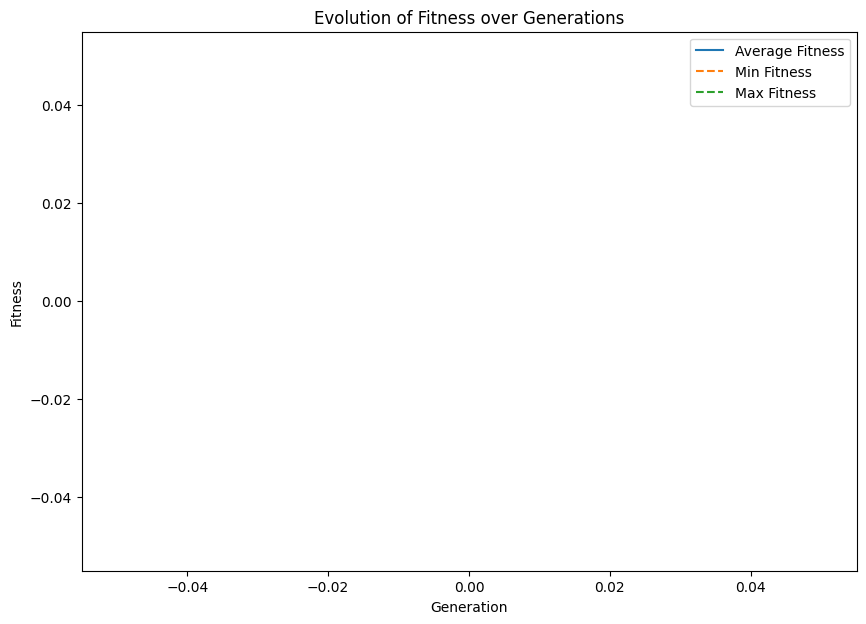

In [15]:
import matplotlib.pyplot as plt

# Visualization of th 1-st function:
plt.figure(figsize=(10, 7))

# Средняя приспособленность и стандартное отклонение
plt.plot(generations, avg_fitness, label="Average Fitness")
plt.fill_between(generations, avg_fitness - std_dev, avg_fitness + std_dev, alpha=0.2)

# Минимальная и максимальная приспособленность
plt.plot(generations, min_fitness, label="Min Fitness", linestyle="--")
plt.plot(generations, max_fitness, label="Max Fitness", linestyle="--")

plt.title("Evolution of Fitness over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()

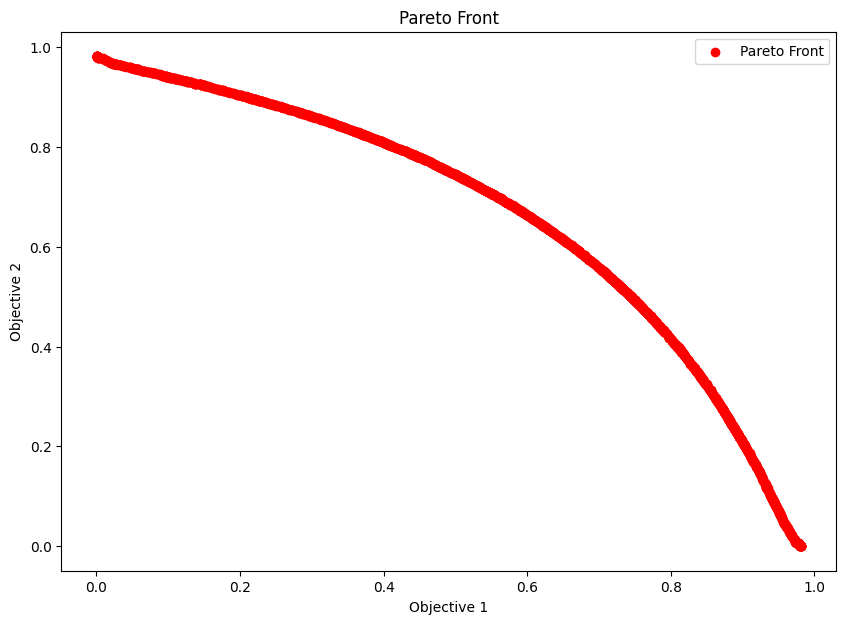

In [13]:
# Визуализация Парето фронта
plt.figure(figsize=(10, 7))
plt.scatter(pareto_front[:, 0], pareto_front[:, 1], c="red", label="Pareto Front")
plt.title("Pareto Front")
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.legend()
plt.show()


## Task 3

TBD

In [ ]:
## Task 3